In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

Goals of this notebook:

1) calculate infall times for LMC and SMC in both MW1 and MW2
2) collect distance of LMC at 3 Gyr ago
3) calculate most recent and penultimate pericenter distance and timing for LMC-SMC

## plot orbit errors

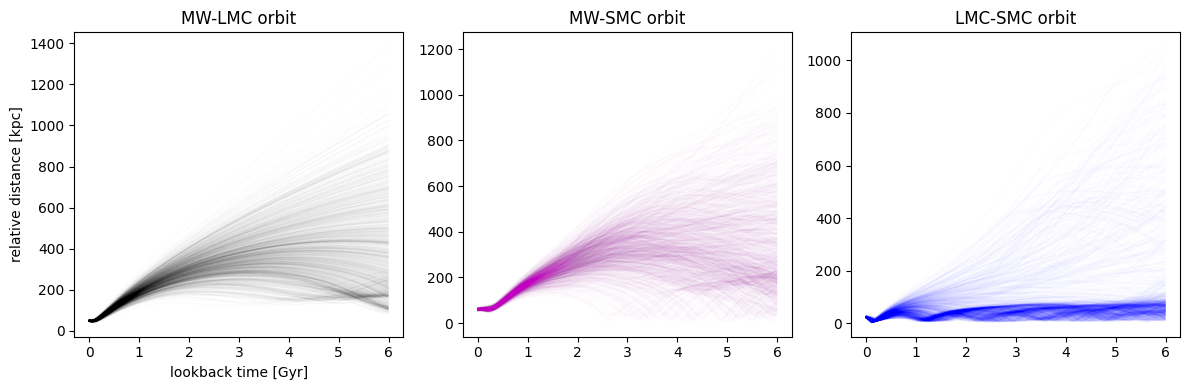

In [2]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

for k in range(1000):
    data = np.loadtxt('orbit_errors/MW1_LMC2_SMC1_MCsats_error%s.txt'%k)
    ts = data[:,0] #Gyr
    ts = [t for t in ts]

    # MW position components 
    mxs = data[:,1]
    mys = data[:,2]
    mzs = data[:,3]

    # LMC position components 
    lxs = data[:,7]
    lys = data[:,8]
    lzs = data[:,9]

    # SMC position components 
    sxs = data[:,13]
    sys = data[:,14]
    szs = data[:,15]

    #orbit of LMC-SMC
    rs = [la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(sxs, sys, szs, lxs, lys, lzs)]
    ax3.plot(ts, rs, 'b', alpha=0.01, lw=1)
    
    #orbit of SMC wrt MW
    smcrs = [la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(sxs, sys, szs, mxs, mys, mzs)]
    ax2.plot(ts, smcrs, 'm', alpha=0.01, lw=1)
    
    #orbit of LMC wrt MW
    lmcrs = [la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(lxs, lys, lzs, mxs, mys, mzs)]
    ax1.plot(ts, lmcrs, 'k', alpha=0.01, lw=1)


ax1.set_xlabel('lookback time [Gyr]')
ax1.set_ylabel('relative distance [kpc]')
ax1.set_title('MW-LMC orbit')
ax2.set_title('MW-SMC orbit')
ax3.set_title('LMC-SMC orbit')
plt.tight_layout()

### collect infall times for the LMC and SMC into the MW halo <br>(MW1 Rvir = 261 kpc, MW2 Rvir = 299 kpc)

In [83]:
smc_tinfall_mw1 = []
smc_tinfall_r_mw1 = []
lmc_tinfall_mw1 = []
lmc_tinfall_r_mw1 = []

rvir = 261.

for k in range(1000):
    data = np.loadtxt('orbit_errors/MW1_LMC2_SMC1_MCsats_error%s.txt'%k)
    ts = data[:,0] #Gyr

    # MW position components 
    mxs = data[:,1]
    mys = data[:,2]
    mzs = data[:,3]

    # LMC position components 
    lxs = data[:,7]
    lys = data[:,8]
    lzs = data[:,9]

    # SMC position components 
    sxs = data[:,13]
    sys = data[:,14]
    szs = data[:,15]
    
    #orbit of LMC wrt MW
    lmcrs = np.array([la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(lxs, lys, lzs, mxs, mys, mzs)])
    
    # get the index of the earliest time where R < Rvir 
    lmc_mask = np.where(lmcrs<rvir)[0][-1] # the position within Rvir
    
    # get the index of the time before lmc_mask
    lmc_mask2 = lmc_mask+1
    
    if lmc_mask2 >= 600:
        continue
        
    if lmcrs[lmc_mask] < lmcrs[lmc_mask2]:
        lmc_tinfall_mw1.append(ts[lmc_mask])
        lmc_tinfall_r_mw1.append(lmcrs[lmc_mask])

    #orbit of SMC wrt MW
    smcrs = np.array([la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(sxs, sys, szs, mxs, mys, mzs)])
    smc_mask = np.where(smcrs<rvir)[0][-1]
    smc_mask2 = smc_mask + 1
    if smc_mask2 >= 600:
        continue
    if smcrs[smc_mask] < smcrs[smc_mask2]:
        smc_tinfall_mw1.append(ts[smc_mask])
        smc_tinfall_r_mw1.append(smcrs[smc_mask])
#     #orbit of LMC-SMC
#     rs = np.array([la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(sxs, sys, szs, lxs, lys, lzs)])


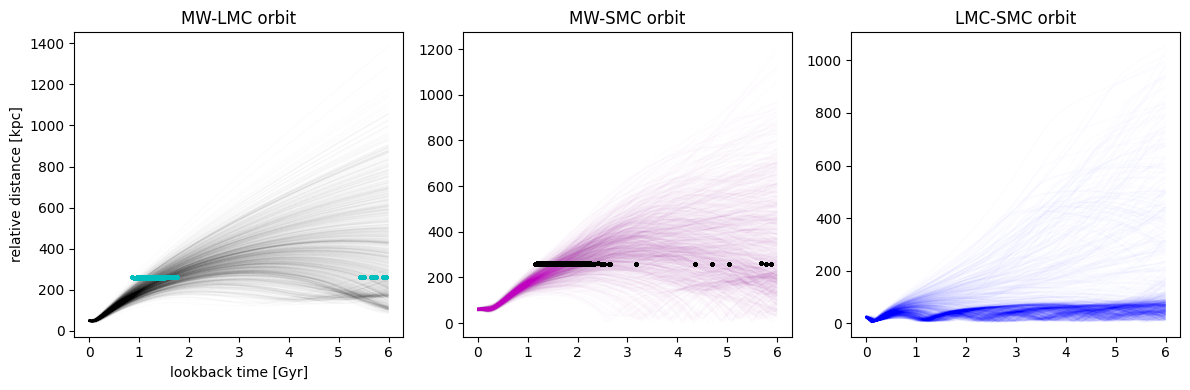

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

for k in range(1000):
    data = np.loadtxt('orbit_errors/MW1_LMC2_SMC1_MCsats_error%s.txt'%k)
    ts = data[:,0] #Gyr
    ts = [t for t in ts]

    # MW position components 
    mxs = data[:,1]
    mys = data[:,2]
    mzs = data[:,3]

    # LMC position components 
    lxs = data[:,7]
    lys = data[:,8]
    lzs = data[:,9]

    # SMC position components 
    sxs = data[:,13]
    sys = data[:,14]
    szs = data[:,15]

    #orbit of LMC-SMC
    rs = [la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(sxs, sys, szs, lxs, lys, lzs)]
    ax3.plot(ts, rs, 'b', alpha=0.01, lw=1)
    
    #orbit of SMC wrt MW
    smcrs = [la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(sxs, sys, szs, mxs, mys, mzs)]
    ax2.plot(ts, smcrs, 'm', alpha=0.01, lw=1)
    ax2.plot(smc_tinfall_mw1, smc_tinfall_r_mw1, 'o', ms=2, color='k')
    
    #orbit of LMC wrt MW
    lmcrs = [la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(lxs, lys, lzs, mxs, mys, mzs)]
    ax1.plot(ts, lmcrs, 'k', alpha=0.01, lw=1)
    ax1.plot(lmc_tinfall_mw1, lmc_tinfall_r_mw1, 'o', ms=2, color='c')

ax1.set_xlabel('lookback time [Gyr]')
ax1.set_ylabel('relative distance [kpc]')
ax1.set_title('MW-LMC orbit')
ax2.set_title('MW-SMC orbit')
ax3.set_title('LMC-SMC orbit')
plt.tight_layout()

In [89]:
# % of orbits where an infall time is recovered
print('LMC:', len(lmc_tinfall_mw1)/10)
print('SMC:', len(smc_tinfall_mw1)/10)

LMC: 61.5
SMC: 49.3


(array([  0.,   0.,   0.,   3., 135., 256.,  66.,  18.,   7.,   0.,   1.,
          0.,   0.,   0.,   1.,   1.,   1.,   0.,   2.,   2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 20 artists>)

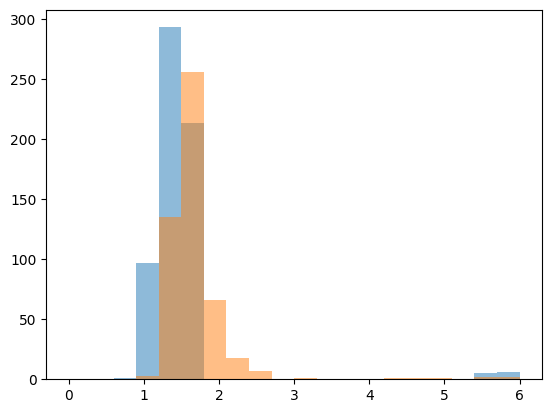

In [90]:
plt.hist(lmc_tinfall_mw1, bins=20, range=(0,6), alpha=0.5)
plt.hist(smc_tinfall_mw1, bins=20, range=(0,6), alpha=0.5)

In [91]:
# tinfall percentiles [median and 1 sigma]
print('LMC tinfall:',np.percentile(lmc_tinfall_mw1, [15.9, 50., 84.1]))
print('SMC tinfall:',np.percentile(smc_tinfall_mw1, [15.9, 50., 84.1]))

LMC tinfall: [1.19626 1.42    1.61   ]
SMC tinfall: [1.42    1.59    1.83772]


Note: these values do not account for the orbits where R < Rvir at all times (i.e., this only includes the fraction of orbits where the XMC crosses Rvir >= 1 time)

# repeat above for MW2

In [93]:
smc_tinfall_mw2 = []
smc_tinfall_r_mw2 = []
lmc_tinfall_mw2 = []
lmc_tinfall_r_mw2 = []

rvir = 261.

for k in range(1000):
    data = np.loadtxt('orbit_errors/MW2_LMC2_SMC1_MCsats_error%s.txt'%k)
    ts = data[:,0] #Gyr

    # MW position components 
    mxs = data[:,1]
    mys = data[:,2]
    mzs = data[:,3]

    # LMC position components 
    lxs = data[:,7]
    lys = data[:,8]
    lzs = data[:,9]

    # SMC position components 
    sxs = data[:,13]
    sys = data[:,14]
    szs = data[:,15]
    
    #orbit of LMC wrt MW
    lmcrs = np.array([la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(lxs, lys, lzs, mxs, mys, mzs)])
    
    # get the index of the earliest time where R < Rvir 
    lmc_mask = np.where(lmcrs<rvir)[0][-1] # the position within Rvir
    
    # get the index of the time before lmc_mask
    lmc_mask2 = lmc_mask+1
    
    if lmc_mask2 >= 600:
        continue
        
    if lmcrs[lmc_mask] < lmcrs[lmc_mask2]:
        lmc_tinfall_mw2.append(ts[lmc_mask])
        lmc_tinfall_r_mw2.append(lmcrs[lmc_mask])

    #orbit of SMC wrt MW
    smcrs = np.array([la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(sxs, sys, szs, mxs, mys, mzs)])
    smc_mask = np.where(smcrs<rvir)[0][-1]
    smc_mask2 = smc_mask + 1
    if smc_mask2 >= 600:
        continue
    if smcrs[smc_mask] < smcrs[smc_mask2]:
        smc_tinfall_mw2.append(ts[smc_mask])
        smc_tinfall_r_mw2.append(smcrs[smc_mask])
#     #orbit of LMC-SMC
#     rs = np.array([la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(sxs, sys, szs, lxs, lys, lzs)])


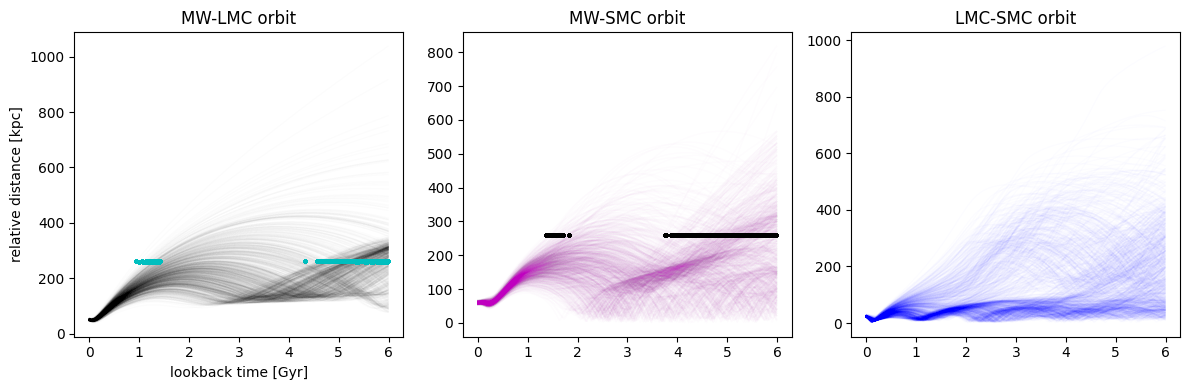

In [94]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

for k in range(1000):
    data = np.loadtxt('orbit_errors/MW2_LMC2_SMC1_MCsats_error%s.txt'%k)
    ts = data[:,0] #Gyr
    ts = [t for t in ts]

    # MW position components 
    mxs = data[:,1]
    mys = data[:,2]
    mzs = data[:,3]

    # LMC position components 
    lxs = data[:,7]
    lys = data[:,8]
    lzs = data[:,9]

    # SMC position components 
    sxs = data[:,13]
    sys = data[:,14]
    szs = data[:,15]

    #orbit of LMC-SMC
    rs = [la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(sxs, sys, szs, lxs, lys, lzs)]
    ax3.plot(ts, rs, 'b', alpha=0.01, lw=1)
    
    #orbit of SMC wrt MW
    smcrs = [la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(sxs, sys, szs, mxs, mys, mzs)]
    ax2.plot(ts, smcrs, 'm', alpha=0.01, lw=1)
    ax2.plot(smc_tinfall_mw2, smc_tinfall_r_mw2, 'o', ms=2, color='k')
    
    #orbit of LMC wrt MW
    lmcrs = [la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(lxs, lys, lzs, mxs, mys, mzs)]
    ax1.plot(ts, lmcrs, 'k', alpha=0.01, lw=1)
    ax1.plot(lmc_tinfall_mw2, lmc_tinfall_r_mw2, 'o', ms=2, color='c')

ax1.set_xlabel('lookback time [Gyr]')
ax1.set_ylabel('relative distance [kpc]')
ax1.set_title('MW-LMC orbit')
ax2.set_title('MW-SMC orbit')
ax3.set_title('LMC-SMC orbit')
plt.tight_layout()

In [95]:
# % of orbits where an infall time is recovered
print('LMC:', len(lmc_tinfall_mw2)/10)
print('SMC:', len(smc_tinfall_mw2)/10)


# tinfall percentiles [median and 1 sigma]
print('LMC tinfall:',np.percentile(lmc_tinfall_mw2, [15.9, 50., 84.1]))
print('SMC tinfall:',np.percentile(smc_tinfall_mw2, [15.9, 50., 84.1]))

LMC: 64.8
SMC: 40.2
LMC tinfall: [4.72873 5.31    5.71127]
SMC tinfall: [4.38759 5.04    5.46241]


### what is the distance (with uncertainties) of the LMC at 3 Gyr ago?

In [98]:
lmc_mw1_d3 = np.zeros(1000)
lmc_mw2_d3 = np.zeros(1000)

for k in range(1000):
    data = np.loadtxt('orbit_errors/MW1_LMC2_SMC1_MCsats_error%s.txt'%k)
    ts = data[:,0] #Gyr
    ts = [t for t in ts]

    # MW position components 
    mxs = data[:,1]
    mys = data[:,2]
    mzs = data[:,3]

    # LMC position components 
    lxs = data[:,7]
    lys = data[:,8]
    lzs = data[:,9]

    #orbit of LMC wrt MW
    lmcrs = [la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(lxs, lys, lzs, mxs, mys, mzs)]
    lmc_mw1_d3[k] = lmcrs[301]
    
    #### MW2 ####
    data = np.loadtxt('orbit_errors/MW2_LMC2_SMC1_MCsats_error%s.txt'%k)
    ts = data[:,0] #Gyr
    ts = [t for t in ts]

    # MW position components 
    mxs = data[:,1]
    mys = data[:,2]
    mzs = data[:,3]

    # LMC position components 
    lxs = data[:,7]
    lys = data[:,8]
    lzs = data[:,9]

    #orbit of LMC wrt MW
    lmcrs = [la.norm([x-x2,y-y2,z-z2]) for x,y,z,x2,y2,z2 in zip(lxs, lys, lzs, mxs, mys, mzs)]
    lmc_mw2_d3[k] = lmcrs[301]

In [99]:
print('LMC distance from MW1 3 Gyr ago:',np.percentile(lmc_mw1_d3, [15.9, 50., 84.1]))
print('LMC distance from MW2 3 Gyr ago:',np.percentile(lmc_mw2_d3, [15.9, 50., 84.1]))

LMC distance from MW1 3 Gyr ago: [270.98570443 355.99081335 464.95827487]
LMC distance from MW2 3 Gyr ago: [126.38284485 198.29684289 318.50867034]


### calculate distance and timing of most recent and penultimate pericenter of LMC-SMC

In [119]:
from scipy.signal import argrelextrema

In [120]:
rperi1 = []
tperi1 = []
rperi2 = []
tperi2 = []

for k in range(1000):
    data = np.loadtxt('orbit_errors/MW1_LMC2_SMC1_MCsats_error%s.txt'%k)
    ts = np.array(data[:,0]) #Gyr

    # MW position components 
    mxs = data[:,1]
    mys = data[:,2]
    mzs = data[:,3]

    # LMC position components 
    lxs = data[:,7]
    lys = data[:,8]
    lzs = data[:,9]

    # SMC position components 
    sxs = data[:,13]
    sys = data[:,14]
    szs = data[:,15]

    #orbit of LMC-SMC
    rs = np.array([la.norm([x-x2,y-y2,z-z2], axis=0) for x,y,z,x2,y2,z2 in zip(sxs, sys, szs, lxs, lys, lzs)])

    rperi, tperi = rs[argrelextrema(rs, np.less)[0]],ts[argrelextrema(rs, np.less)[0]]
    #print(rperi[0], tperi[0])
    rperi1.append(rperi[0])
    tperi1.append(tperi[0])
    
    if len(rperi) > 1:
        rperi2.append(rperi[1])
        tperi2.append(tperi[1])

In [121]:
# stats for most recent LMC-SMC peri
print('distance (kpc):', np.percentile(rperi1, [15.9, 50., 84.1]), 'time (Gyr ago):', np.percentile(tperi1, [15.9, 50., 84.1]))


# stats for penultimate LMC-SMC peri
print('distance (kpc):', np.percentile(rperi2, [15.9, 50., 84.1]), 'time (Gyr ago):', np.percentile(tperi2, [15.9, 50., 84.1]))

distance (kpc): [ 4.78276981  7.37071408 10.90046089] time (Gyr ago): [0.13 0.16 0.22]
distance (kpc): [ 7.91618508 11.4331039  28.14454272] time (Gyr ago): [1.15    1.4     2.18984]


# repeat for MW2

In [122]:
rperi1 = []
tperi1 = []
rperi2 = []
tperi2 = []

for k in range(1000):
    data = np.loadtxt('orbit_errors/MW2_LMC2_SMC1_MCsats_error%s.txt'%k)
    ts = np.array(data[:,0]) #Gyr

    # MW position components 
    mxs = data[:,1]
    mys = data[:,2]
    mzs = data[:,3]

    # LMC position components 
    lxs = data[:,7]
    lys = data[:,8]
    lzs = data[:,9]

    # SMC position components 
    sxs = data[:,13]
    sys = data[:,14]
    szs = data[:,15]

    #orbit of LMC-SMC
    rs = np.array([la.norm([x-x2,y-y2,z-z2], axis=0) for x,y,z,x2,y2,z2 in zip(sxs, sys, szs, lxs, lys, lzs)])

    rperi, tperi = rs[argrelextrema(rs, np.less)[0]],ts[argrelextrema(rs, np.less)[0]]
    #print(rperi[0], tperi[0])
    rperi1.append(rperi[0])
    tperi1.append(tperi[0])
    
    if len(rperi) > 1:
        rperi2.append(rperi[1])
        tperi2.append(tperi[1])
        
# stats for most recent LMC-SMC peri
print('distance (kpc):', np.percentile(rperi1, [15.9, 50., 84.1]), 'time (Gyr ago):', np.percentile(tperi1, [15.9, 50., 84.1]))


# stats for penultimate LMC-SMC peri
print('distance (kpc):', np.percentile(rperi2, [15.9, 50., 84.1]), 'time (Gyr ago):', np.percentile(tperi2, [15.9, 50., 84.1]))


distance (kpc): [ 5.01240348  7.82657501 11.80563493] time (Gyr ago): [0.13 0.16 0.21]
distance (kpc): [ 9.57741351 16.86102893 77.39851619] time (Gyr ago): [1.05 1.34 4.46]
